In [2]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [3]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [4]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Values of equilibrium

phi_ext_val=np.pi
ng_val=0.5

#Qubit parameters 1 

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))



In [ ]:
$THIS ALL VALUES CHANGE WITH EACH GAP SIZE!!!!!!!!!!!!$

In [399]:
#1ST VALUES

#OJOOOO SE CAMBIA CON CADA SET OF VALUES
epsilon_n=0.01*0.5
epsilon_phi=(0.022776*np.pi)

#T=200*1/0.083
T=100.5*1/0.00195092
print(T)
#N_time=10000
N_time=1000
Delta_t=T/N_time
print(Delta_t)
time_array=np.linspace(Delta_t,T,N_time)
print(time_array)

51514.157423164455
51.514157423164455
[   51.51415742   103.02831485   154.54247227   206.05662969
   257.57078712   309.08494454   360.59910196   412.11325939
   463.62741681   515.14157423   566.65573165   618.16988908
   669.6840465    721.19820392   772.71236135   824.22651877
   875.74067619   927.25483362   978.76899104  1030.28314846
  1081.79730589  1133.31146331  1184.82562073  1236.33977816
  1287.85393558  1339.368093    1390.88225043  1442.39640785
  1493.91056527  1545.42472269  1596.93888012  1648.45303754
  1699.96719496  1751.48135239  1802.99550981  1854.50966723
  1906.02382466  1957.53798208  2009.0521395   2060.56629693
  2112.08045435  2163.59461177  2215.1087692   2266.62292662
  2318.13708404  2369.65124147  2421.16539889  2472.67955631
  2524.19371374  2575.70787116  2627.22202858  2678.736186
  2730.25034343  2781.76450085  2833.27865827  2884.7928157
  2936.30697312  2987.82113054  3039.33528797  3090.84944539
  3142.36360281  3193.87776024  3245.39191766  329

In [6]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [7]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [8]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [9]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [10]:
def U_t(Hamiltonian,time):
    return scipy.linalg.expm(-1j*Hamiltonian*time)

In [11]:
def calculate_overlap(vect1,vect2):
    return np.abs(np.conj(vect1)@vect2)**2

In [400]:
#THESE ARE LOAD FOR M=20,N=50
#EIGENVECTS_NG=np.load('EIGVECTS_NG.npy')
#EIGENVECTS_PHIEXT=np.load('EIGVECTS_PHIEXT.npy')
EIGENVECTS2_NG=np.load('EIGVECTS2_NG_EG_1.npy')
EIGENVECTS2_PHIEXT=np.load('EIGVECTS2_PHIEXT_EG_1.npy')
#print("SET 1 FOR NG =>",EIGENVECTS_NG)
#print("SET 1 FOR PHI_EXT =>",EIGENVECTS_PHIEXT)
#print("SET 2 FOR NG =>",EIGENVECTS2_NG)
#print("SET 2 FOR PHI_EXT =>",EIGENVECTS2_PHIEXT)

PRUEBAS: CREO QUE AHORA SIIIIIII

In [44]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

#Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

#Overlap2_GS_PHIEXT=[]

#for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
#    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
#    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
#   print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
#    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
#    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
#    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
#    print("Overlaps calculated")
#    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
#   Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)

In [45]:
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.npy', Ovrlap2_GS_PHIEXT)

#plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\varphi_{ext}$")
#plt.axhline(1, color='black', linestyle='--')
#plt.axhline(0, color='black', linestyle='--')
#plt.legend()
#plt.savefig('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.png',dpi=300,bbox_inches='tight')
#plt.show()

In [401]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

Psi2_GS_NG=EIGENVECTS2_NG[0]
Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

Overlap2_GS_NG=[]
Overlap2_GS_NG_comparison_phi0=[]
Overlap2_GS_NG_comparison_phi2=[]
Overlap2_GS_PHIEXT=[]
Overlap2_GS_PHIEXT_comparison_ng0=[]
Overlap2_GS_PHIEXT_comparison_ng2=[]

for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
    Haux2_NG=timedep_Hamiltonian_0pi_for_ng(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #phi_ext
    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)#DEBATE IF I NEDED THE PHIEXT HAM BEACUSE THE RESULTS WERE WRONG!!!!!!!
    print("Hamiltonians calculated")
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
    propagator2_NG=U_t(Haux2_NG,Delta_t)
    #phi_ext
    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
    print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
    Psi2_GS_NG=propagator2_NG@Psi2_GS_NG
    #phi_ext
    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
    Overlap_Psi2_GS_NG=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_NG[2])
    Overlap_Psi2_GS_NG_comparison_phi0=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_PHIEXT[0])
    Overlap_Psi2_GS_NG_comparison_phi2=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_PHIEXT[2])
    #phi_ext
    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
    Overlap_Psi2_GS_PHIEXT_comparison_ng0=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_NG[0])
    Overlap_Psi2_GS_PHIEXT_comparison_ng2=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_NG[2])
    print("Overlaps calculated")
    print("Overlap_Psi2_GS_NG =",Overlap_Psi2_GS_NG)
    print("Overlap_Psi2_GS_NG_comparison_phi0 =",Overlap_Psi2_GS_NG_comparison_phi0)
    print("Overlap_Psi2_GS_NG_comparison_phi2 =",Overlap_Psi2_GS_NG_comparison_phi2)
    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
    print("Overlap_Psi2_GS_PHIEXT_comparison_ng0 =",Overlap_Psi2_GS_PHIEXT_comparison_ng0)
    print("Overlap_Psi2_GS_PHIEXT_comparison_ng2 =",Overlap_Psi2_GS_PHIEXT_comparison_ng2)
    Overlap2_GS_NG.append(Overlap_Psi2_GS_NG)
    Overlap2_GS_NG_comparison_phi0.append(Overlap_Psi2_GS_NG_comparison_phi0)
    Overlap2_GS_NG_comparison_phi2.append(Overlap_Psi2_GS_NG_comparison_phi2)
    Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)
    Overlap2_GS_PHIEXT_comparison_ng0.append(Overlap_Psi2_GS_PHIEXT_comparison_ng0)
    Overlap2_GS_PHIEXT_comparison_ng2.append(Overlap_Psi2_GS_PHIEXT_comparison_ng2)

Hamiltonians calculated
Propagators calculated
Evolution step =  51.514157423164455  done
Overlaps calculated
Overlap_Psi2_GS_NG = 2.4909510554916445e-08
Overlap_Psi2_GS_NG_comparison_phi0 = 0.49999618958138226
Overlap_Psi2_GS_NG_comparison_phi2 = 0.4999801770042091
Overlap_Psi2_GS_PHIEXT = 2.4898895068026526e-08
Overlap_Psi2_GS_PHIEXT_comparison_ng0 = 0.49999610968337016
Overlap_Psi2_GS_PHIEXT_comparison_ng2 = 0.49998025765689574
Hamiltonians calculated


In [ ]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_NG_M20N50_EG_2_good.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_NG_likephi0 = np.array(Overlap2_GS_NG_comparison_phi0)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi0_M20N50_EG_2_good.npy', Ovrlap2_GS_NG_likephi0)
#Ovrlap2_GS_NG_likephi2 = np.array(Overlap2_GS_NG_comparison_phi2)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi2_M20N50_EG_2_good.npy', Ovrlap2_GS_NG_likephi2)
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_M20N50_EG_2_good.npy', Ovrlap2_GS_PHIEXT)
#Ovrlap2_GS_PHIEXT_likeng0 = np.array(Overlap2_GS_PHIEXT_comparison_ng0)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng0_M20N50_EG_2_good.npy', Ovrlap2_GS_PHIEXT_likeng0)
#Ovrlap2_GS_PHIEXT_likeng2 = np.array(Overlap2_GS_PHIEXT_comparison_ng2)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng2_M20N50_EG_2_good.npy', Ovrlap2_GS_PHIEXT_likeng2)
#
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
#plt.plot(12814.467020687676,0.14777916105284386, 'ro')
#plt.plot(16146.22844606647,0.22421773197138237, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
#plt.plot(19221.700531031514,0.31124743468783095, 'ro')
#plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(2084.5436216382463, color='black', linestyle='dotted')
#plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
#plt.plot(22553.46195641031,0.405687137182611, 'ro')
#plt.axvline(4237.432935789222, color='black', linestyle='dotted')
#plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
#plt.plot(25628.934041375353,0.5037498148895604, 'ro')
#plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(6390.322249940198, color='black', linestyle='dotted') #4271.605782045587
#plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
#plt.plot(28960.695466754147,0.6016795255624605, 'ro')
#plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
##plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
#plt.axvline(8543.211564091172, color='black', linestyle='dotted')
#plt.plot(32036.167551719187,0.6956771895474363, 'ro')
#plt.axvline(10696.100878242149, color='black', linestyle='dotted')
#plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
#plt.plot(35367.92897709798,0.7820428041370546, 'ro')
#plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(12848.990192393125, color='black', linestyle='dotted')
#plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
#plt.plot(38699.69040247678,0.8575615690874825, 'ro')
#plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(15001.879506544099, color='black', linestyle='dotted')
##plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
#plt.axvline(17154.768820695077, color='black', linestyle='dotted')
#plt.plot(256.2893404137535,0.5009500341989357, 'ro')
#plt.axvline(19307.658134846053, color='black', linestyle='dotted')
#plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
#plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
#print(3331.7614253787956-256.2893404137535)
#plt.plot(6407.233510343838,0.6922207364876315, 'ro')
#plt.axvline(21460.54744899703, color='black', linestyle='dotted')
#plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
#print(6407.233510343838-3331.7614253787956)
#plt.plot(9738.994935722634,0.7790707238522113, 'ro')
#plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(23613.436763148005, color='black', linestyle='dotted')
#plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
#print(9738.994935722634-6407.233510343838)
#plt.axvline(25766.32607729898, color='black', linestyle='dotted')
#plt.plot(12814.467020687676,0.8548808348604641, 'ro')
#plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(27919.215391449954, color='black', linestyle='dotted')
#plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
#print(12814.467020687676-9738.994935722634)
#plt.plot(16146.22844606647,0.9170677620336155, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(45209.43964898612, 0.8748808348604641,r"$\omega_2$")
#plt.axvline(30072.10470560093, color='black', linestyle='dotted')
#plt.axvline(32224.994019751906, color='black', linestyle='dotted')
#plt.axvline(64584.47238928375, color='black', linestyle='dotted')
#plt.axvline(32224.994019751906, color='black', linestyle='dotted')
#plt.axvline(50642.77366575769, color='black', linestyle='dotted')
#print(4237.432935789222-2084.5436216382463)
#print(6390.322249940198-4237.432935789222)
#print(8543.211564091172-6390.322249940198)
#print(10696.100878242149-8543.211564091172)
#print(12848.990192393125-10696.100878242149)
#print(15001.879506544099-12848.990192393125)
#print(17154.768820695077-15001.879506544099)
#print(19307.658134846053-17154.768820695077)
#print(21460.54744899703-19307.658134846053)
#print(23613.436763148005-21460.54744899703)
#print(25766.32607729898-23613.436763148005)
#print(27919.215391449954-25766.32607729898)
#print(30072.10470560093-27919.215391449954)
#print(32224.994019751906-30072.10470560093)
#print(64584.47238928375-60278.840896664835)
#print(96877.37067639882-90418.87929797223)
#print(27885.04254519359-96877.37067639882)
#print(30072.10470560093-27885.04254519359)
#print(32259.166866008272-30072.10470560093)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
#plt.plot(256.2893404137535,0.49902632110672973, 'ro')
#plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
#plt.plot(6407.233510343838,0.3077591192218341, 'ro')
#plt.plot(9738.994935722634,0.22091301699160001, 'ro')
#plt.plot(12814.467020687676,0.14510739079964122, 'ro')
#plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.axhline(0.5, color='black', linestyle='--')
#plt.savefig('T_EVOL_T100_5_INVGAP_Nt1000_NG_PHIEXT_M20N50_EG_2_alloverlapsandfreqs_grid.png',dpi=300,bbox_inches='tight')
plt.show()

2152.8893141509757
2152.889314150976
2152.8893141509743
2152.889314150976
2152.889314150976
2152.8893141509743
2152.889314150978
2152.889314150976
2152.889314150976
2152.889314150976
2152.889314150976
2152.8893141509725
2152.889314150976
2152.889314150976


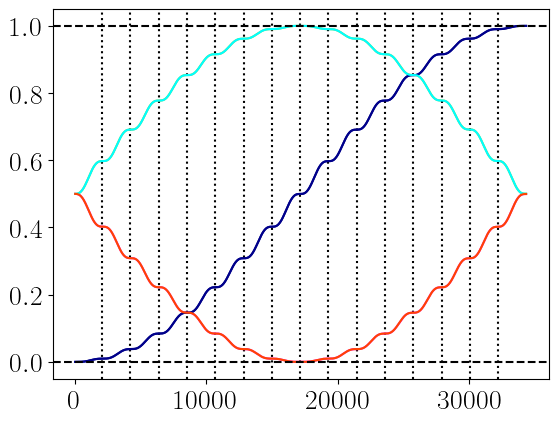

In [398]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_NG_M20N50_EG_2_good.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_NG_likephi0 = np.array(Overlap2_GS_NG_comparison_phi0)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi0_M20N50_EG_2_good.npy', Ovrlap2_GS_NG_likephi0)
#Ovrlap2_GS_NG_likephi2 = np.array(Overlap2_GS_NG_comparison_phi2)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_NG_likephi2_M20N50_EG_2_good.npy', Ovrlap2_GS_NG_likephi2)
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_M20N50_EG_2_good.npy', Ovrlap2_GS_PHIEXT)
#Ovrlap2_GS_PHIEXT_likeng0 = np.array(Overlap2_GS_PHIEXT_comparison_ng0)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng0_M20N50_EG_2_good.npy', Ovrlap2_GS_PHIEXT_likeng0)
#Ovrlap2_GS_PHIEXT_likeng2 = np.array(Overlap2_GS_PHIEXT_comparison_ng2)
#np.save('T_EVOL_T100_5_INVGAP_Nt1000_PHIEXT_likeng2_M20N50_EG_2_good.npy', Ovrlap2_GS_PHIEXT_likeng2)
#
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
#plt.plot(12814.467020687676,0.14777916105284386, 'ro')
#plt.plot(16146.22844606647,0.22421773197138237, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
#plt.plot(19221.700531031514,0.31124743468783095, 'ro')
#plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(2084.5436216382463, color='black', linestyle='dotted')
#plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
#plt.plot(22553.46195641031,0.405687137182611, 'ro')
plt.axvline(4237.432935789222, color='black', linestyle='dotted')
#plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
#plt.plot(25628.934041375353,0.5037498148895604, 'ro')
#plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(6390.322249940198, color='black', linestyle='dotted') #4271.605782045587
#plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
#plt.plot(28960.695466754147,0.6016795255624605, 'ro')
#plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
##plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
plt.axvline(8543.211564091172, color='black', linestyle='dotted')
#plt.plot(32036.167551719187,0.6956771895474363, 'ro')
plt.axvline(10696.100878242149, color='black', linestyle='dotted')
#plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
#plt.plot(35367.92897709798,0.7820428041370546, 'ro')
#plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(12848.990192393125, color='black', linestyle='dotted')
#plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
#plt.plot(38699.69040247678,0.8575615690874825, 'ro')
#plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(15001.879506544099, color='black', linestyle='dotted')
##plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
plt.axvline(17154.768820695077, color='black', linestyle='dotted')
#plt.plot(256.2893404137535,0.5009500341989357, 'ro')
plt.axvline(19307.658134846053, color='black', linestyle='dotted')
#plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
#plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
#print(3331.7614253787956-256.2893404137535)
#plt.plot(6407.233510343838,0.6922207364876315, 'ro')
plt.axvline(21460.54744899703, color='black', linestyle='dotted')
#plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
#print(6407.233510343838-3331.7614253787956)
#plt.plot(9738.994935722634,0.7790707238522113, 'ro')
#plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(23613.436763148005, color='black', linestyle='dotted')
#plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
#print(9738.994935722634-6407.233510343838)
plt.axvline(25766.32607729898, color='black', linestyle='dotted')
#plt.plot(12814.467020687676,0.8548808348604641, 'ro')
#plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(27919.215391449954, color='black', linestyle='dotted')
#plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
#print(12814.467020687676-9738.994935722634)
#plt.plot(16146.22844606647,0.9170677620336155, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(45209.43964898612, 0.8748808348604641,r"$\omega_2$")
plt.axvline(30072.10470560093, color='black', linestyle='dotted')
plt.axvline(32224.994019751906, color='black', linestyle='dotted')
#plt.axvline(64584.47238928375, color='black', linestyle='dotted')
#plt.axvline(32224.994019751906, color='black', linestyle='dotted')
#plt.axvline(50642.77366575769, color='black', linestyle='dotted')
print(4237.432935789222-2084.5436216382463)
print(6390.322249940198-4237.432935789222)
print(8543.211564091172-6390.322249940198)
print(10696.100878242149-8543.211564091172)
print(12848.990192393125-10696.100878242149)
print(15001.879506544099-12848.990192393125)
print(17154.768820695077-15001.879506544099)
print(19307.658134846053-17154.768820695077)
print(21460.54744899703-19307.658134846053)
print(23613.436763148005-21460.54744899703)
print(25766.32607729898-23613.436763148005)
print(27919.215391449954-25766.32607729898)
print(30072.10470560093-27919.215391449954)
print(32224.994019751906-30072.10470560093)
#print(64584.47238928375-60278.840896664835)
#print(96877.37067639882-90418.87929797223)
#print(27885.04254519359-96877.37067639882)
#print(30072.10470560093-27885.04254519359)
#print(32259.166866008272-30072.10470560093)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
#plt.plot(256.2893404137535,0.49902632110672973, 'ro')
#plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
#plt.plot(6407.233510343838,0.3077591192218341, 'ro')
#plt.plot(9738.994935722634,0.22091301699160001, 'ro')
#plt.plot(12814.467020687676,0.14510739079964122, 'ro')
#plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.axhline(0.5, color='black', linestyle='--')
#plt.savefig('T_EVOL_T100_5_INVGAP_Nt1000_NG_PHIEXT_M20N50_EG_2_alloverlapsandfreqs_grid.png',dpi=300,bbox_inches='tight')
plt.show()

4305.631492618915
4305.631492618917
4305.631492618915
4305.631492618919
4305.631492618915
4305.631492618915
4305.631492618915
4305.6314926189225
4305.631492618915
4305.631492618915
4305.631492618915
4305.631492618915
4305.6314926189225
4305.631492618915


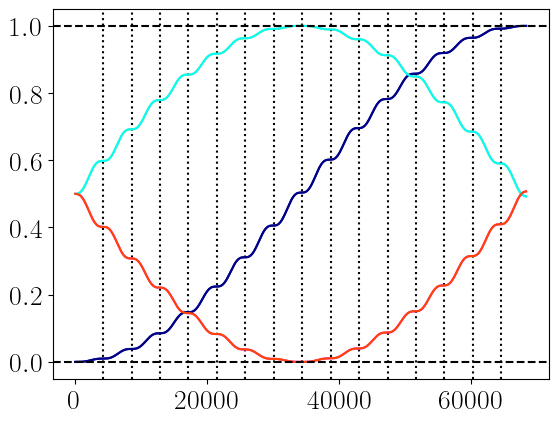

In [302]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T100_INVGAP_Nt1000_NG_M20N50_EG_4_good.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_NG_likephi0 = np.array(Overlap2_GS_NG_comparison_phi0)
#np.save('T_EVOL_T100_INVGAP_Nt1000_NG_likephi0_M20N50_EG_4_good.npy', Ovrlap2_GS_NG_likephi0)
#Ovrlap2_GS_NG_likephi2 = np.array(Overlap2_GS_NG_comparison_phi2)
#np.save('T_EVOL_T100_INVGAP_Nt1000_NG_likephi2_M20N50_EG_4_good.npy', Ovrlap2_GS_NG_likephi2)
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T100_INVGAP_Nt1000_PHIEXT_M20N50_EG_4_good.npy', Ovrlap2_GS_PHIEXT)
#Ovrlap2_GS_PHIEXT_likeng0 = np.array(Overlap2_GS_PHIEXT_comparison_ng0)
#np.save('T_EVOL_T100_INVGAP_Nt1000_PHIEXT_likeng0_M20N50_EG_4_good.npy', Ovrlap2_GS_PHIEXT_likeng0)
#Ovrlap2_GS_PHIEXT_likeng2 = np.array(Overlap2_GS_PHIEXT_comparison_ng2)
#np.save('T_EVOL_T100_INVGAP_Nt1000_PHIEXT_likeng2_M20N50_EG_4_good.npy', Ovrlap2_GS_PHIEXT_likeng2)
#
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
#plt.plot(12814.467020687676,0.14777916105284386, 'ro')
#plt.plot(16146.22844606647,0.22421773197138237, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
#plt.plot(19221.700531031514,0.31124743468783095, 'ro')
#plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(34.17284625636469, color='black', linestyle='dotted')
#plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
#plt.plot(22553.46195641031,0.405687137182611, 'ro')
#plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(4305.631492618917, color='black', linestyle='dotted')
#plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
#plt.plot(25628.934041375353,0.5037498148895604, 'ro')
#plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(8611.262985237832, color='black', linestyle='dotted') #4271.605782045587
#plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
#plt.plot(28960.695466754147,0.6016795255624605, 'ro')
#plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
plt.axvline(12916.89447785675, color='black', linestyle='dotted')
#plt.plot(32036.167551719187,0.6956771895474363, 'ro')
plt.axvline(17222.525970475665, color='black', linestyle='dotted')
#plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
#plt.plot(35367.92897709798,0.7820428041370546, 'ro')
#plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(21528.157463094583, color='black', linestyle='dotted')
#plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
#plt.plot(38699.69040247678,0.8575615690874825, 'ro')
#plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(25833.7889557135, color='black', linestyle='dotted')
##plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
plt.axvline(30139.420448332414, color='black', linestyle='dotted')
#plt.plot(256.2893404137535,0.5009500341989357, 'ro')
plt.axvline(34445.05194095133, color='black', linestyle='dotted')
#plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
#plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
#print(3331.7614253787956-256.2893404137535)
#plt.plot(6407.233510343838,0.6922207364876315, 'ro')
plt.axvline(38750.68343357025, color='black', linestyle='dotted')
#plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
#print(6407.233510343838-3331.7614253787956)
#plt.plot(9738.994935722634,0.7790707238522113, 'ro')
#plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(43056.31492618917, color='black', linestyle='dotted')
#plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
#print(9738.994935722634-6407.233510343838)
#plt.plot(12814.467020687676,0.8548808348604641, 'ro')
plt.axvline(47361.94641880808, color='black', linestyle='dotted')
#plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
plt.axvline(51667.577911427, color='black', linestyle='dotted')
#print(12814.467020687676-9738.994935722634)
#plt.plot(16146.22844606647,0.9170677620336155, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(45209.43964898612, 0.8748808348604641,r"$\omega_2$")
plt.axvline(55973.20940404591, color='black', linestyle='dotted')
plt.axvline(60278.840896664835, color='black', linestyle='dotted')
plt.axvline(64584.47238928375, color='black', linestyle='dotted')
#plt.axvline(32224.994019751906, color='black', linestyle='dotted')
#plt.axvline(50642.77366575769, color='black', linestyle='dotted')
print(8611.262985237832-4305.631492618917)
print(12916.89447785675-8611.262985237832)
print(17222.525970475665-12916.89447785675)
print(21528.157463094583-17222.525970475665)
print(25833.7889557135-21528.157463094583)
print(30139.420448332414-25833.7889557135)
print(34445.05194095133-30139.420448332414)
print(38750.68343357025-34445.05194095133)
print(43056.31492618917-38750.68343357025)
print(47361.94641880808-43056.31492618917)
print(51667.577911427-47361.94641880808)
print(55973.20940404591-51667.577911427)
print(60278.840896664835-55973.20940404591)
print(64584.47238928375-60278.840896664835)
#print(96877.37067639882-90418.87929797223)
#print(27885.04254519359-96877.37067639882)
#print(30072.10470560093-27885.04254519359)
#print(32259.166866008272-30072.10470560093)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
#plt.plot(256.2893404137535,0.49902632110672973, 'ro')
#plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
#plt.plot(6407.233510343838,0.3077591192218341, 'ro')
#plt.plot(9738.994935722634,0.22091301699160001, 'ro')
#plt.plot(12814.467020687676,0.14510739079964122, 'ro')
#plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.savefig('T_EVOL_T100_INVGAP_Nt1000_NG_PHIEXT_M20N50_EG_4_alloverlapsandfreqs_grid.png',dpi=300,bbox_inches='tight')
plt.show()

6458.491378426589
6458.491378426585
6458.491378426588
6458.491378426588
6458.491378426592
6458.491378426581
6458.491378426588
6458.491378426588
6458.491378426588
6458.491378426588
6458.4913784265955
6458.491378426581
6458.4913784265955
6458.491378426581


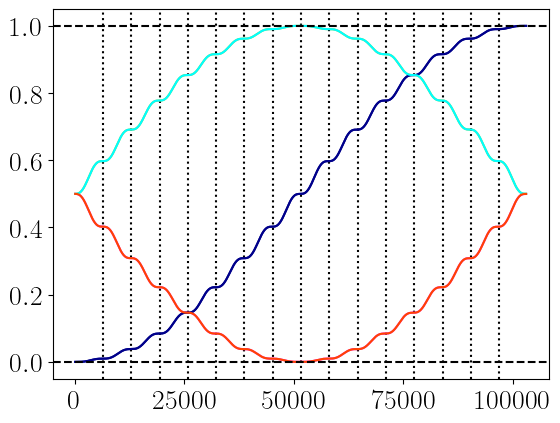

In [388]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T100_INVGAP_Nt1000_NG_M20N50_EG_3_good.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_NG_likephi0 = np.array(Overlap2_GS_NG_comparison_phi0)
#np.save('T_EVOL_T100_INVGAP_Nt1000_NG_likephi0_M20N50_EG_3_good.npy', Ovrlap2_GS_NG_likephi0)
#Ovrlap2_GS_NG_likephi2 = np.array(Overlap2_GS_NG_comparison_phi2)
#np.save('T_EVOL_T100_INVGAP_Nt1000_NG_likephi2_M20N50_EG_3_good.npy', Ovrlap2_GS_NG_likephi2)
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T100_INVGAP_Nt1000_PHIEXT_M20N50_EG_3_good.npy', Ovrlap2_GS_PHIEXT)
#Ovrlap2_GS_PHIEXT_likeng0 = np.array(Overlap2_GS_PHIEXT_comparison_ng0)
#np.save('T_EVOL_T100_INVGAP_Nt1000_PHIEXT_likeng0_M20N50_EG_3_good.npy', Ovrlap2_GS_PHIEXT_likeng0)
#Ovrlap2_GS_PHIEXT_likeng2 = np.array(Overlap2_GS_PHIEXT_comparison_ng2)
#np.save('T_EVOL_T100_INVGAP_Nt1000_PHIEXT_likeng2_M20N50_EG_3_good.npy', Ovrlap2_GS_PHIEXT_likeng2)
#
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
#plt.plot(12814.467020687676,0.14777916105284386, 'ro')
#plt.plot(16146.22844606647,0.22421773197138237, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
#plt.plot(19221.700531031514,0.31124743468783095, 'ro')
#plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(34.17284625636469, color='black', linestyle='dotted')
#plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
#plt.plot(22553.46195641031,0.405687137182611, 'ro')
#plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
plt.axvline(6458.491378426587, color='black', linestyle='dotted')
#plt.plot(25628.934041375353,0.5037498148895604, 'ro')
#plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(12916.982756853176, color='black', linestyle='dotted') #4271.605782045587
#plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
#plt.plot(28960.695466754147,0.6016795255624605, 'ro')
#plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
plt.axvline(19375.47413527976, color='black', linestyle='dotted')
#plt.plot(32036.167551719187,0.6956771895474363, 'ro')
plt.axvline(25833.96551370635, color='black', linestyle='dotted')
#plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
#plt.plot(35367.92897709798,0.7820428041370546, 'ro')
#plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
plt.axvline(32292.456892132937, color='black', linestyle='dotted')
#plt.plot(38699.69040247678,0.8575615690874825, 'ro')
#plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(38750.94827055953, color='black', linestyle='dotted')
##plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
plt.axvline(45209.43964898611, color='black', linestyle='dotted')
#plt.plot(256.2893404137535,0.5009500341989357, 'ro')
plt.axvline(51667.9310274127, color='black', linestyle='dotted')
#plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
#plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
#print(3331.7614253787956-256.2893404137535)
#plt.plot(6407.233510343838,0.6922207364876315, 'ro')
plt.axvline(58126.42240583929, color='black', linestyle='dotted')
#plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
#print(6407.233510343838-3331.7614253787956)
#plt.plot(9738.994935722634,0.7790707238522113, 'ro')
#plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
plt.axvline(64584.913784265875, color='black', linestyle='dotted')
#print(9738.994935722634-6407.233510343838)
#plt.plot(12814.467020687676,0.8548808348604641, 'ro')
plt.axvline(71043.40516269246, color='black', linestyle='dotted')
#plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
plt.axvline(77501.89654111906, color='black', linestyle='dotted')
#print(12814.467020687676-9738.994935722634)
#plt.plot(16146.22844606647,0.9170677620336155, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(45209.43964898612, 0.8748808348604641,r"$\omega_2$")
plt.axvline(83960.38791954564, color='black', linestyle='dotted')
plt.axvline(90418.87929797223, color='black', linestyle='dotted')
plt.axvline(96877.37067639882, color='black', linestyle='dotted')
#plt.axvline(32224.994019751906, color='black', linestyle='dotted')
#plt.axvline(50642.77366575769, color='black', linestyle='dotted')
#print(2084.5436216382463-34.17284625636469)
print(12916.982756853176-6458.491378426587)
print(19375.47413527976-12916.982756853176)
print(25833.96551370635-19375.47413527976)
print(32292.456892132937-25833.96551370635)
print(38750.94827055953-32292.456892132937)
print(45209.43964898611-38750.94827055953)
print(51667.9310274127-45209.43964898611)
print(58126.42240583929-51667.9310274127)
print(64584.913784265875-58126.42240583929)
print(71043.40516269246-64584.913784265875)
print(77501.89654111906-71043.40516269246)
print(83960.38791954564-77501.89654111906)
print(90418.87929797223-83960.38791954564)
print(96877.37067639882-90418.87929797223)
#print(27885.04254519359-96877.37067639882)
#print(30072.10470560093-27885.04254519359)
#print(32259.166866008272-30072.10470560093)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
#plt.plot(256.2893404137535,0.49902632110672973, 'ro')
#plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
#plt.plot(6407.233510343838,0.3077591192218341, 'ro')
#plt.plot(9738.994935722634,0.22091301699160001, 'ro')
#plt.plot(12814.467020687676,0.14510739079964122, 'ro')
#plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.savefig('T_EVOL_T100_5_INVGAP_Nt1000_NG_PHIEXT_M20N50_EG_3_alloverlapsandfreqs_grid.png',dpi=300,bbox_inches='tight')
plt.show()

3229.245689213294
3229.245689213293
3229.245689213294
3229.245689213294
3229.2456892132923
3229.245689213294
3229.245689213294
3229.245689213294
3229.245689213294
3229.245689213294
3229.2456892132977
3229.2456892132905
3229.2456892132905
3229.2456892132977


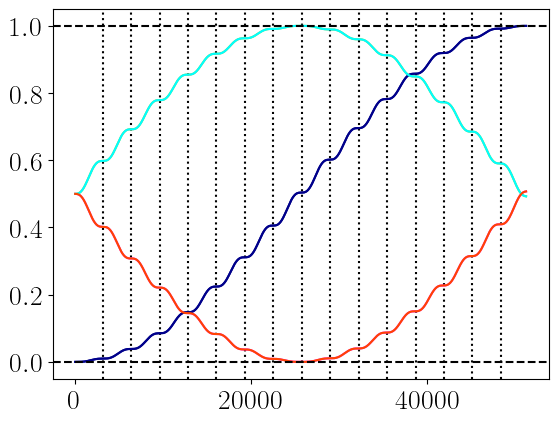

In [90]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T100_INVGAP_Nt1000_NG_M20N50_EG_1_good.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_NG_likephi0 = np.array(Overlap2_GS_NG_comparison_phi0)
#np.save('T_EVOL_T100_INVGAP_Nt1000_NG_likephi0_M20N50_EG_1_good.npy', Ovrlap2_GS_NG_likephi0)
#Ovrlap2_GS_NG_likephi2 = np.array(Overlap2_GS_NG_comparison_phi2)
#np.save('T_EVOL_T100_INVGAP_Nt1000_NG_likephi2_M20N50_EG_1_good.npy', Ovrlap2_GS_NG_likephi2)
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T100_INVGAP_Nt1000_PHIEXT_M20N50_EG_1_good.npy', Ovrlap2_GS_PHIEXT)
#Ovrlap2_GS_PHIEXT_likeng0 = np.array(Overlap2_GS_PHIEXT_comparison_ng0)
#np.save('T_EVOL_T100_INVGAP_Nt1000_PHIEXT_likeng0_M20N50_EG_1_good.npy', Ovrlap2_GS_PHIEXT_likeng0)
#Ovrlap2_GS_PHIEXT_likeng2 = np.array(Overlap2_GS_PHIEXT_comparison_ng2)
#np.save('T_EVOL_T100_INVGAP_Nt1000_PHIEXT_likeng2_M20N50_EG_1_good.npy', Ovrlap2_GS_PHIEXT_likeng2)
#
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
#plt.plot(12814.467020687676,0.14777916105284386, 'ro')
#plt.plot(16146.22844606647,0.22421773197138237, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
#plt.plot(19221.700531031514,0.31124743468783095, 'ro')
#plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.axvline(51.2578680827507, color='black', linestyle='dotted')
#plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
#plt.plot(22553.46195641031,0.405687137182611, 'ro')
#plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
plt.axvline(3177.987821130543, color='black', linestyle='dotted')
#plt.plot(25628.934041375353,0.5037498148895604, 'ro')
#plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(6407.233510343837, color='black', linestyle='dotted')
#plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
#plt.plot(28960.695466754147,0.6016795255624605, 'ro')
#plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
plt.axvline(9636.47919955713, color='black', linestyle='dotted')
#plt.plot(32036.167551719187,0.6956771895474363, 'ro')
#plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(12865.724888770425, color='black', linestyle='dotted')
#plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
#plt.plot(35367.92897709798,0.7820428041370546, 'ro')
#plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
plt.axvline(16094.970577983719, color='black', linestyle='dotted')
#plt.plot(38699.69040247678,0.8575615690874825, 'ro')
#plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
plt.axvline(19324.21626719701, color='black', linestyle='dotted')
##plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
#plt.axvline(32087.425419801933, color='black', linestyle='dotted')
#plt.plot(256.2893404137535,0.5009500341989357, 'ro')
#plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
plt.axvline(22553.461956410305, color='black', linestyle='dotted')
#plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
#print(3331.7614253787956-256.2893404137535)
#plt.plot(6407.233510343838,0.6922207364876315, 'ro')
plt.axvline(25782.7076456236, color='black', linestyle='dotted')
#plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
#print(6407.233510343838-3331.7614253787956)
#plt.plot(9738.994935722634,0.7790707238522113, 'ro')
#plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
plt.axvline(29011.953334836893, color='black', linestyle='dotted')
#print(9738.994935722634-6407.233510343838)
#plt.plot(12814.467020687676,0.8548808348604641, 'ro')
plt.axvline(32241.199024050187, color='black', linestyle='dotted')
#plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
plt.axvline(35419.18684518073, color='black', linestyle='dotted')
#print(12814.467020687676-9738.994935722634)
#plt.plot(16146.22844606647,0.9170677620336155, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(45209.43964898612, 0.8748808348604641,r"$\omega_2$")
plt.axvline(38699.69040247678, color='black', linestyle='dotted')
plt.axvline(41928.93609169007, color='black', linestyle='dotted')
plt.axvline(45158.18178090336, color='black', linestyle='dotted')
plt.axvline(48387.42747011666, color='black', linestyle='dotted')
#plt.axvline(50642.77366575769, color='black', linestyle='dotted')
#print(3229.2456892132936-51.2578680827507)
print(6407.233510343837-3177.987821130543)
print(9636.47919955713-6407.233510343837)
print(12865.724888770425-9636.47919955713)
print(16094.970577983719-12865.724888770425)
print(19324.21626719701-16094.970577983719)
print(22553.461956410305-19324.21626719701)
print(25782.7076456236-22553.461956410305)
print(29011.953334836893-25782.7076456236)
print(32241.199024050187-29011.953334836893)
print(35470.44471326348-32241.199024050187)
print(38699.69040247678-35470.44471326348)
print(41928.93609169007-38699.69040247678)
print(45158.18178090336-41928.93609169007)
print(48387.42747011666-45158.18178090336)
#print(27885.04254519359-48387.42747011666)
#print(30072.10470560093-27885.04254519359)
#print(32259.166866008272-30072.10470560093)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
#plt.plot(256.2893404137535,0.49902632110672973, 'ro')
#plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
#plt.plot(6407.233510343838,0.3077591192218341, 'ro')
#plt.plot(9738.994935722634,0.22091301699160001, 'ro')
#plt.plot(12814.467020687676,0.14510739079964122, 'ro')
#plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.savefig('T_EVOL_T100_INVGAP_Nt1000_NG_PHIEXT_M20N50_EG_2_alloverlapsandfreqs_grid.png',dpi=300,bbox_inches='tight')
plt.show()

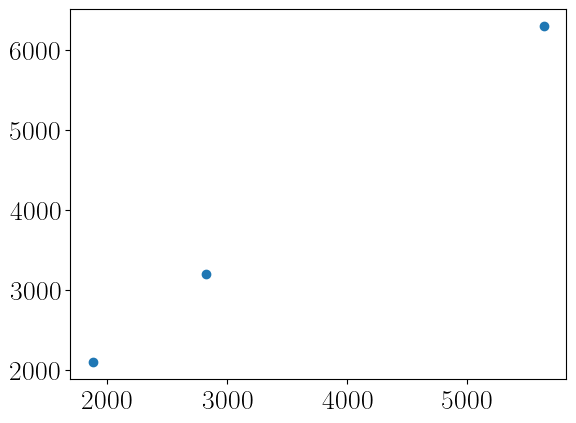

In [380]:
x1=([1879.506,2819.18,5638.36])
x2=([0.00097546,0.00195092,0.0029263])
y1=([2100,3200,6300])
y2=([6300,3200,2100])
plt.plot(x1,y1,"o")
plt.show()

3075.472084965042
3075.4720849650425
3331.761425378796
3075.472084965042
3331.7614253787942
3075.472084965044
3331.7614253787942
3075.472084965044
3331.7614253787942
3075.4720849650403
3331.7614253787942
3331.761425378798


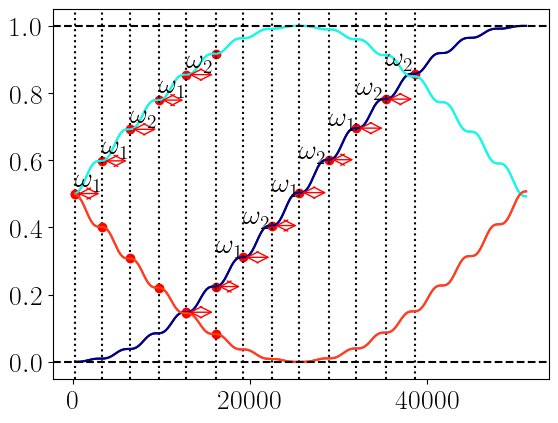

In [226]:
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
plt.plot(12814.467020687676,0.14777916105284386, 'ro')
plt.plot(16146.22844606647,0.22421773197138237, 'ro')
plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
plt.plot(19221.700531031514,0.31124743468783095, 'ro')
plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
plt.axvline(19221.700531031514, color='black', linestyle='dotted')
plt.plot(22553.46195641031,0.405687137182611, 'ro')
plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
plt.axvline(22553.46195641031, color='black', linestyle='dotted')
plt.plot(25628.934041375353,0.5037498148895604, 'ro')
plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
plt.axvline(25628.934041375353, color='black', linestyle='dotted')
plt.plot(28960.695466754147,0.6016795255624605, 'ro')
plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
plt.axvline(28960.695466754147, color='black', linestyle='dotted')
plt.plot(32036.167551719187,0.6956771895474363, 'ro')
plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
plt.axvline(32036.167551719187, color='black', linestyle='dotted')
plt.plot(35367.92897709798,0.7820428041370546, 'ro')
plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
plt.axvline(35367.92897709798, color='black', linestyle='dotted')
plt.plot(38699.69040247678,0.8575615690874825, 'ro')
plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")
plt.axvline(38699.69040247678, color='black', linestyle='dotted')

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
plt.plot(256.2893404137535,0.5009500341989357, 'ro')
plt.axvline(256.2893404137535, color='black', linestyle='dotted')
plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
plt.axvline(3331.7614253787956, color='black', linestyle='dotted')
print(3331.7614253787956-256.2893404137535)
plt.plot(6407.233510343838,0.6922207364876315, 'ro')
plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
plt.axvline(6407.233510343838, color='black', linestyle='dotted')
print(6407.233510343838-3331.7614253787956)
plt.plot(9738.994935722634,0.7790707238522113, 'ro')
plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
plt.axvline(9738.994935722634, color='black', linestyle='dotted')
print(9738.994935722634-6407.233510343838)
plt.plot(12814.467020687676,0.8548808348604641, 'ro')
plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
plt.axvline(12814.467020687676, color='black', linestyle='dotted')
print(12814.467020687676-9738.994935722634)
plt.plot(16146.22844606647,0.9170677620336155, 'ro')
plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(12814.467020687676, 0.8748808348604641,r"$\omega_2$")
plt.axvline(16146.22844606647, color='black', linestyle='dotted')
print(16146.22844606647-12814.467020687676)
print(19221.700531031514-16146.22844606647)
print(22553.46195641031-19221.700531031514)
print(25628.934041375353-22553.46195641031)
print(28960.695466754147-25628.934041375353)
print(32036.167551719187-28960.695466754147)
print(35367.92897709798-32036.167551719187)
print(38699.69040247678-35367.92897709798)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
plt.plot(256.2893404137535,0.49902632110672973, 'ro')
plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
plt.plot(6407.233510343838,0.3077591192218341, 'ro')
plt.plot(9738.994935722634,0.22091301699160001, 'ro')
plt.plot(12814.467020687676,0.14510739079964122, 'ro')
plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.savefig('T_EVOL_T100_INVGAP_Nt200_NG_PHIEXT_M20N50_EG_1_alloverlapsandfreqs.png',dpi=300,bbox_inches='tight')
plt.show()

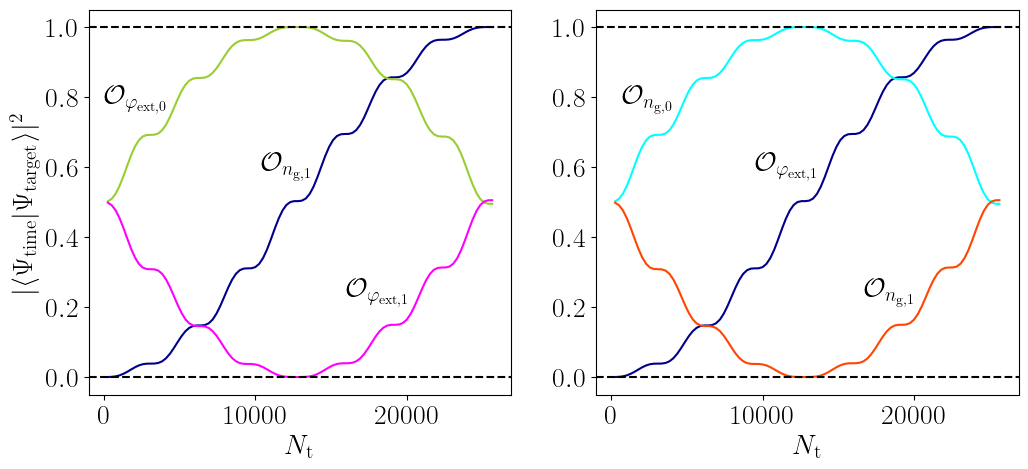

In [ ]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T5_5_INVGAP_Nt1000_NG_M20N50_EG_1.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_PHIEXT= np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T5_5_INVGAP_Nt1000_PHIEXT_M20N50_EG_1.npy', Ovrlap2_GS_PHIEXT)
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(121)
ax1.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
ax1.set_xlabel(r"$N_{\rm t}$")
ax1.axhline(1, color='black', linestyle='--')
ax1.axhline(0, color='black', linestyle='--')
#ax1.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax1.set_ylabel(r"$| \langle \Psi_{\rm time} | \Psi_{\rm target} \rangle |^2$")
ax1.text(0,0.78,r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $")
ax1.text(10400,0.59,r"$\mathcal{O}_{n_{\rm g, 1}}$")
ax1.text(16000,0.23,r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $")

ax2=fig.add_subplot(122)
ax2.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
ax2.set_xlabel(r"$N_{\rm t}$")
ax2.axhline(1, color='black', linestyle='--')
ax2.axhline(0, color='black', linestyle='--')
#ax2.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax2.text(700,0.78,r"$\mathcal{O}_{n_{\rm g, 0}} $")
ax2.text(9500,0.59,r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$")
ax2.text(16700,0.23,r"$\mathcal{O}_{n_{\rm g, 1}} $")

fig.subplots_adjust(wspace=0.2)
#plt.savefig('T_EVOL_T55_INVGAP_Nt100_NG_PHIEXT_M20N50_EG_1_PRUEBATRAYECTORIA.png',dpi=300,bbox_inches='tight')
plt.show()

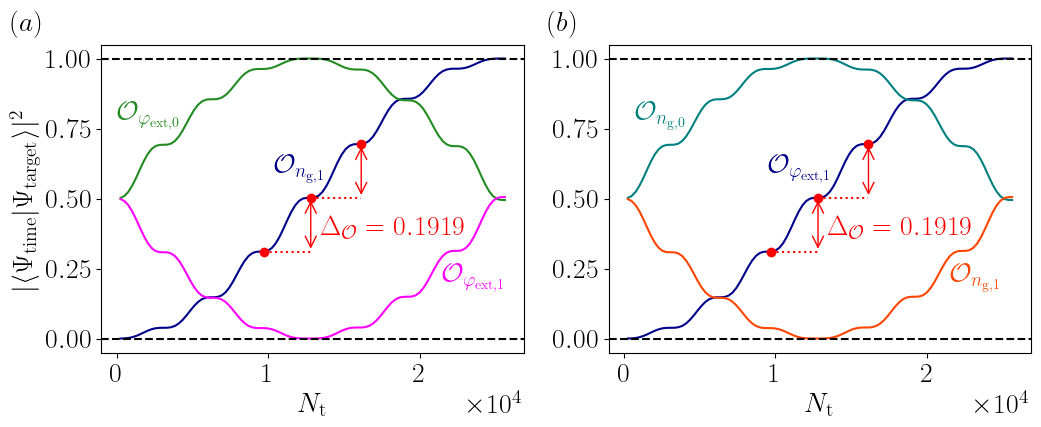

In [148]:
fig=plt.figure(figsize=(12,4))

ax1=fig.add_subplot(121)
ax1.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "forestgreen")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
ax1.set_xlabel(r"$N_{\rm t}$")
ax1.axhline(1, color='black', linestyle='--')
ax1.axhline(0, color='black', linestyle='--')
#ax1.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax1.set_ylabel(r"$| \langle \Psi_{\rm time} | \Psi_{\rm target} \rangle |^2$")
ax1.text(0,0.78,r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $", color= "forestgreen")
ax1.text(10400,0.59,r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
ax1.text(21500,0.2,r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $", color="magenta")
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax1.text(-7000,1.1,r"$(a)$")
ax1.plot(9738.9949,0.3107359761260982, 'ro')
ax1.plot(12814.4670,0.50257991221575732, 'ro')
ax1.plot(16146.2284,0.6945328989051015, 'ro')
ax1.annotate("", xy=(12814.4670, 0.50257991221575732), xytext=(12814.4670, 0.3107359761260982), arrowprops=dict(arrowstyle='<->', color="red"))
ax1.annotate("", xy=(16146.2284, 0.6945328989051015), xytext=(16146.2284, 0.50257991221575732), arrowprops=dict(arrowstyle='<->', color="red"))
ax1.plot([9738.9949,12814.4670], [0.31070772000691427,0.31070772000691427], 'r:')
ax1.plot([12814.4670,16146.2284], [0.5025822372823341,0.5025822372823341], 'r:')
ax1.text(13500,0.37,r"$\Delta_{\mathcal{O}}=0.1919$",color="red")

ax2=fig.add_subplot(122)
ax2.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "teal")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
ax2.set_xlabel(r"$N_{\rm t}$")
ax2.axhline(1, color='black', linestyle='--')
ax2.axhline(0, color='black', linestyle='--')
#ax2.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax2.text(700,0.78,r"$\mathcal{O}_{n_{\rm g, 0}} $", color= "teal")
ax2.text(9500,0.59,r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
ax2.text(21500,0.2,r"$\mathcal{O}_{n_{\rm g, 1}} $", color="orangered")
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
#ax2.xaxis.get_offset_text().set_position((1.1,0))
ax2.text(-5000,1.1,r"$(b)$")
ax2.plot(9738.9949,0.31070772000691427, 'ro')
ax2.plot(12814.4670,0.5025822372823341, 'ro')
ax2.plot(16146.2284,0.6945689429735011, 'ro')
ax2.annotate("", xy=(12814.4670, 0.5025822372823341), xytext=(12814.4670, 0.31070772000691427), arrowprops=dict(arrowstyle='<->', color="red"))
ax2.annotate("", xy=(16146.2284, 0.6945689429735011), xytext=(16146.2284, 0.5025822372823341), arrowprops=dict(arrowstyle='<->', color="red"))
ax2.plot([9738.9949,12814.4670], [0.31070772000691427,0.31070772000691427], 'r:')
ax2.plot([12814.4670,16146.2284], [0.5025822372823341,0.5025822372823341], 'r:')
ax2.text(13500,0.37,r"$\Delta_{\mathcal{O}}=0.1919$",color="red")


fig.subplots_adjust(wspace=0.2)
#plt.savefig('T_EVOL_T55_INVGAP_Nt100_NG_PHIEXT_M20N50_EG_1_alloverlaps.png',dpi=300,bbox_inches='tight')
plt.show()

In [114]:
N12=0.50257991221575732 - 0.3107359761260982
N23=0.6945328989051015 - 0.50257991221575732
N34=0.8562784025907008 - 0.6945328989051015 
P12=0.5025822372823341 - 0.31070772000691427
P23=0.6945689429735011 - 0.5025822372823341
P34=0.8563128613815412 - 0.6945689429735011 
print(N12, N23, N34)
print(P12, P23, P34)
print((N12 + N23)/2)
print((P12 + P23)/2)


0.19184393608965916 0.19195298668934413 0.16174550368559926
0.19187451727541982 0.19198670569116705 0.16174391840804003
0.19189846138950165
0.19193061148329343
